In [17]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
df.shape[0]

891

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
y_columns = ['Survived']

- <span style = 'font-size:1.3em;line-height:1.5em'><b>아직 모델링에 대해서 배우진 않았기 때문에, 모델의 예측값을 랜덤으로 생성하겠습니다.</b></span>

In [7]:
real_y = df[y_columns].values

threshold = 0.5
pred_score_y = np.random.uniform(low=0.4, high=0.7, size = real_y.shape)
pred_label_y = 1*(pred_score_y>=threshold) # If threshold > threshold, label = 1. If not, label=0

In [8]:
print(pred_score_y)
print(pred_label_y)

[[0.64716266]
 [0.55015864]
 [0.59080434]
 [0.47620557]
 [0.56605014]
 [0.45022927]
 [0.42300889]
 [0.69642273]
 [0.47112053]
 [0.65055068]
 [0.41451697]
 [0.54567305]
 [0.58126123]
 [0.42319427]
 [0.63802864]
 [0.64223682]
 [0.68523332]
 [0.65071346]
 [0.67305099]
 [0.62683592]
 [0.55793041]
 [0.65348708]
 [0.43581011]
 [0.57715455]
 [0.56671524]
 [0.61709441]
 [0.47968758]
 [0.43955597]
 [0.48601698]
 [0.63357043]
 [0.47133648]
 [0.4780491 ]
 [0.57579189]
 [0.50871768]
 [0.56861395]
 [0.63653747]
 [0.51507168]
 [0.40871284]
 [0.4852047 ]
 [0.52635948]
 [0.56251726]
 [0.60647502]
 [0.6995273 ]
 [0.59315962]
 [0.40564073]
 [0.47619669]
 [0.56033759]
 [0.40618648]
 [0.50143217]
 [0.60262023]
 [0.43513983]
 [0.61147781]
 [0.41021436]
 [0.69704737]
 [0.66024797]
 [0.58141546]
 [0.47057282]
 [0.54388697]
 [0.51251592]
 [0.54424215]
 [0.47113511]
 [0.45931713]
 [0.61065735]
 [0.46291056]
 [0.43753884]
 [0.48248776]
 [0.57561527]
 [0.56959352]
 [0.65556583]
 [0.5911691 ]
 [0.47129441]
 [0.44

# Confusion Matrix

### Confusion Matrix는 예측 레이블로만 생성이 가능합니다. (모델의 확률값으로는 생성 불가능합니다.)

- C_ij: 실제 레이블은 i번째 클래스이나 j번째 클래스라고 예측된 데이터 갯수

In [9]:
confusion_matrix(real_y, pred_label_y, labels=[1,0])

array([[215, 127],
       [348, 201]], dtype=int64)

# Accuracy, Precision, Recall, F1

In [10]:
print(accuracy_score(real_y, pred_label_y))
print(precision_score(real_y, pred_label_y, labels=[1,0]))
print(recall_score(real_y, pred_label_y, labels=[1,0]))
print(f1_score(real_y, pred_label_y, labels=[1,0]))




0.4668911335578002
0.38188277087033745
0.6286549707602339
0.4751381215469613


# ROC_curve, ROC_AUC_score

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
fpr, tpr, threshold = roc_curve(real_y, pred_score_y, pos_label=1)

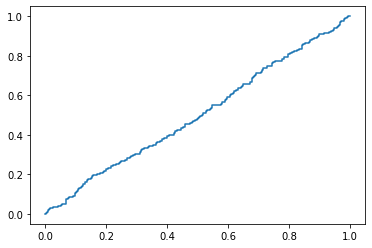

In [13]:
plt.plot(fpr, tpr)

In [14]:
auroc = roc_auc_score(real_y, pred_score_y)

In [15]:
auroc

0.5018268196295231

# 연습문제

<span style = 'font-size:1.3em;line-height:1.5em'>1. Threshold를 바꿔가면서 accuracy, precision, recall, f1 score를 계산해보세요</span>


In [22]:
threshold_list = np.arange(0.5, 1, 0.1)
threshold_list

array([0.5, 0.6, 0.7, 0.8, 0.9])

In [23]:
for threshold in threshold_list:
    real_y = df[y_columns].values
    pred_score_y = np.random.uniform(low=0.4, high=0.7, size = real_y.shape)
    pred_label_y = 1*(pred_score_y>=threshold) # If threshold > threshold, label = 1. If not, label=0
    print('threshold--------------',threshold)
    print(accuracy_score(real_y, pred_label_y))
    print(precision_score(real_y, pred_label_y, labels=[1,0]))
    print(recall_score(real_y, pred_label_y, labels=[1,0]))
    print(f1_score(real_y, pred_label_y, labels=[1,0]))    

threshold-------------- 0.5
0.4590347923681257
0.38095238095238093
0.6549707602339181
0.4817204301075269
threshold-------------- 0.6
0.5286195286195287
0.3664383561643836
0.3128654970760234
0.33753943217665616
threshold-------------- 0.7
0.6161616161616161
0.0
0.0
0.0
threshold-------------- 0.7999999999999999
0.6161616161616161
0.0
0.0
0.0
threshold-------------- 0.8999999999999999
0.6161616161616161
0.0
0.0
0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<span style = 'font-size:1.3em;line-height:1.5em'>2. positive_label=0일때 accuracy, precision, recacll, f1 score를 계산해보세요. positive_label=1일때와 어떻게 차이가 있나요?</span>

In [55]:
real_y = df[y_columns].values

threshold = 0.5
pred_score_y = np.random.uniform(low=0.4, high=0.7, size = real_y.shape)

pred_label_y = 1*(pred_score_y>=threshold) # If threshold < threshold, label = 1. If not, label=0

print('positive_label=1')
print(accuracy_score(real_y, pred_label_y))
print(precision_score(real_y, pred_label_y, labels=[1,0]))
print(recall_score(real_y, pred_label_y, labels=[1,0]))
print(f1_score(real_y, pred_label_y, labels=[1,0])) 


positive_label=1
0.45791245791245794
0.3875598086124402
0.7105263157894737
0.501547987616099


In [56]:
pred_label_y = 1*(pred_score_y<threshold) # If threshold < threshold, label = 1. If not, label=0

print('positive_label=0')
print(accuracy_score(real_y, pred_label_y))
print(precision_score(real_y, pred_label_y, labels=[1,0]))
print(recall_score(real_y, pred_label_y, labels=[1,0]))
print(f1_score(real_y, pred_label_y, labels=[1,0])) 

positive_label=0
0.5420875420875421
0.375
0.2894736842105263
0.32673267326732675


positive_label=0 이 positive_label=1에 비해 recall과 f1-score가 높은 경향이 있음